# Master Data Science and Business Analytics - Exam: Machine Learning

### Directions

Fill the empty code cells in order to implement the described tasks and reproduce the given output.

A slight difference of your output in values and number of rows does not affect a positive evaluation

The program must be _reproducible_: repeated executions must give the same results  

### Workflow
1. load the data in memory
1. drop the useless data
1. separe the predicting attributes X from the class attribute y
1. split X and y into training and test
1. train a classifier of your choice and find the best parameter setting using __cross validation__, optimize for best __accuracy__
1. show a classification report for the training set
1. test the optimized classifier with the _test set_ and show a classification report

In [65]:
# insert your imports here
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [30]:
# insert here your initial variable settings and load the data

df0 = pd.read_csv("mock_exam_data.csv")

Have a quick look to the data.
- use the .shape attribute to see the size
- use the `.head()` function to see column names and some data
- use the `.hist()` method for an histogram of the numeric columns
- show an histogram of the target column
- use seaborn pairplot to show the numeric data, use the target values as color

In [31]:
print(f"Spape of the input data {df0.shape}")


Spape of the input data (1000, 6)


In [32]:
df0.head()

,C00,C01,C02,C03,C04,Class
0,NaN,0.466367,-0.176765,1.546514,0.149219,c
1,NaN,-0.136792,1.551591,NaN,1.357674,a
2,2.712560,-0.495846,NaN,1.483562,1.656526,b
3,-2.166084,-0.582271,0.353011,-1.864210,-2.267033,b
4,2.848831,-0.507369,1.661752,1.466627,1.938519,b


In [33]:
df0.dtypes

C00      float64
C01      float64
C02      float64
C03      float64
C04      float64
Class     object
dtype: object

array([[<Axes: title={'center': 'C00'}>, <Axes: title={'center': 'C01'}>],
       [<Axes: title={'center': 'C02'}>, <Axes: title={'center': 'C03'}>],
       [<Axes: title={'center': 'C04'}>, <Axes: >]], dtype=object)

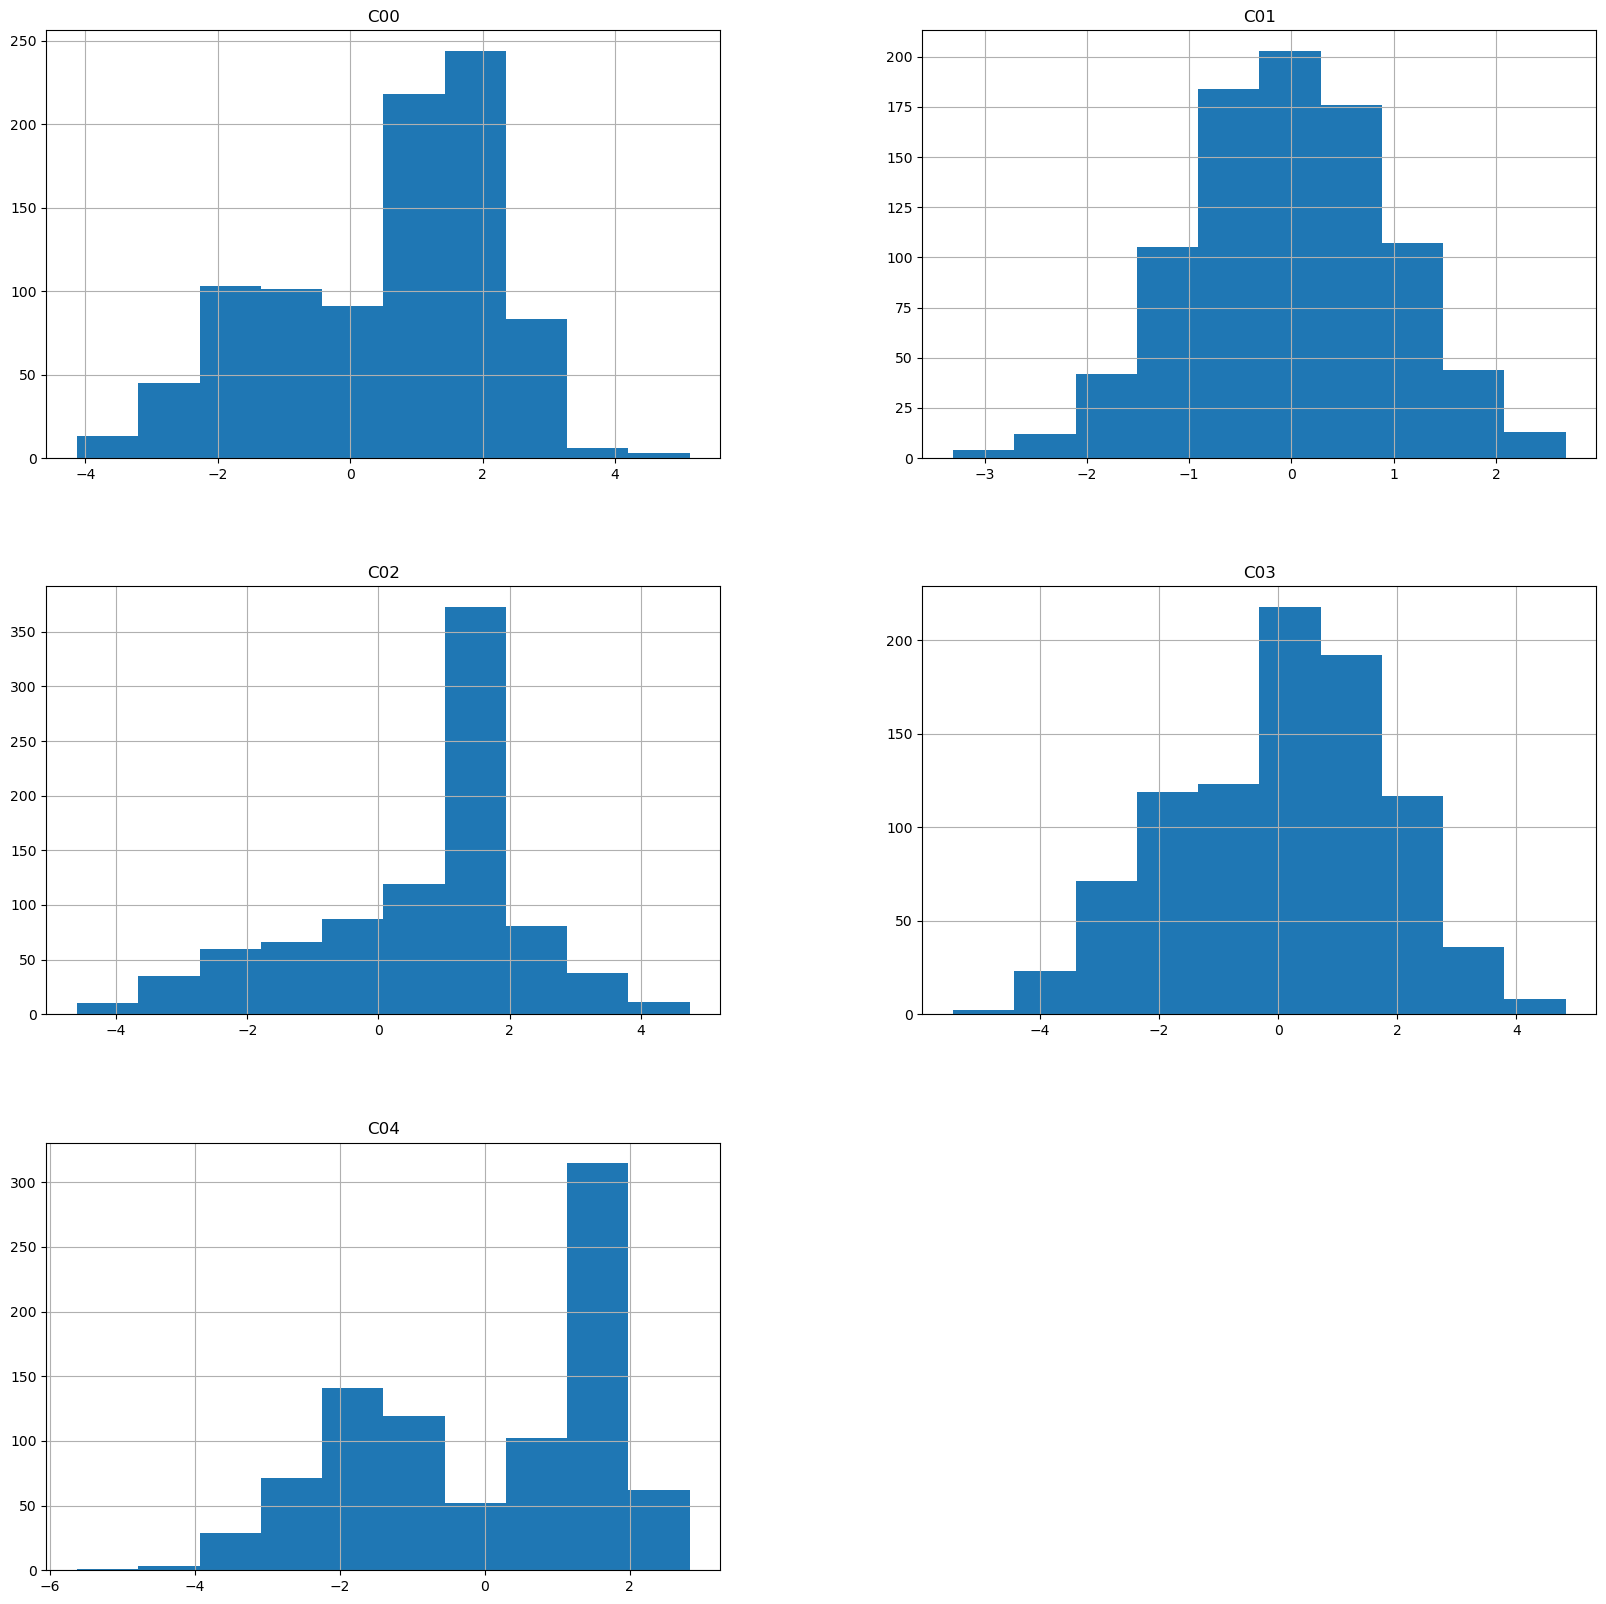

In [34]:
df0.select_dtypes(include='float64').hist(figsize=(20,20))

<Axes: >

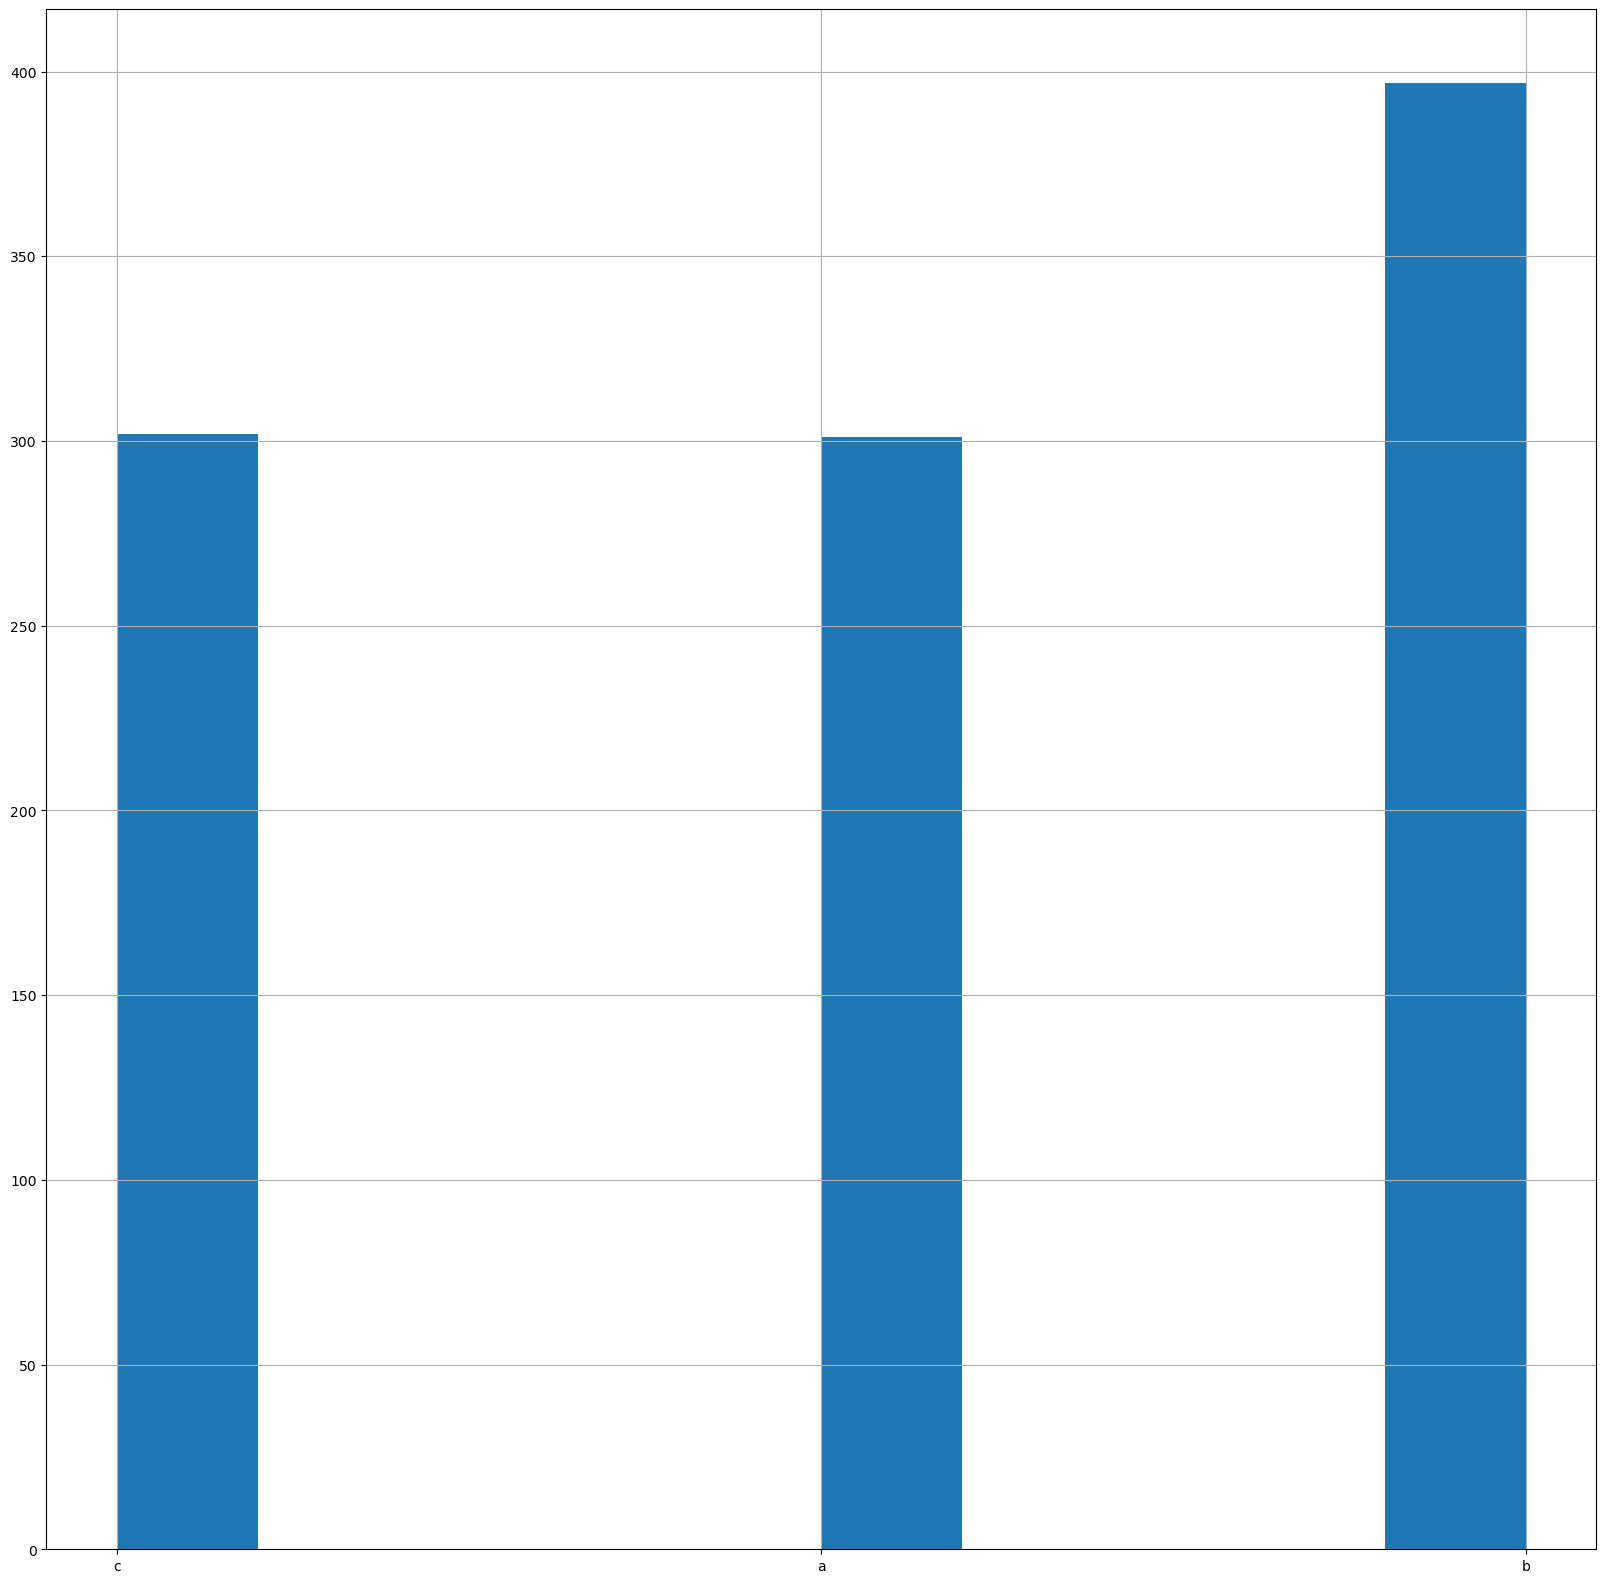

In [35]:
# generate histogram of target column
target = "Class"
df0[target].hist(figsize=(20,20))

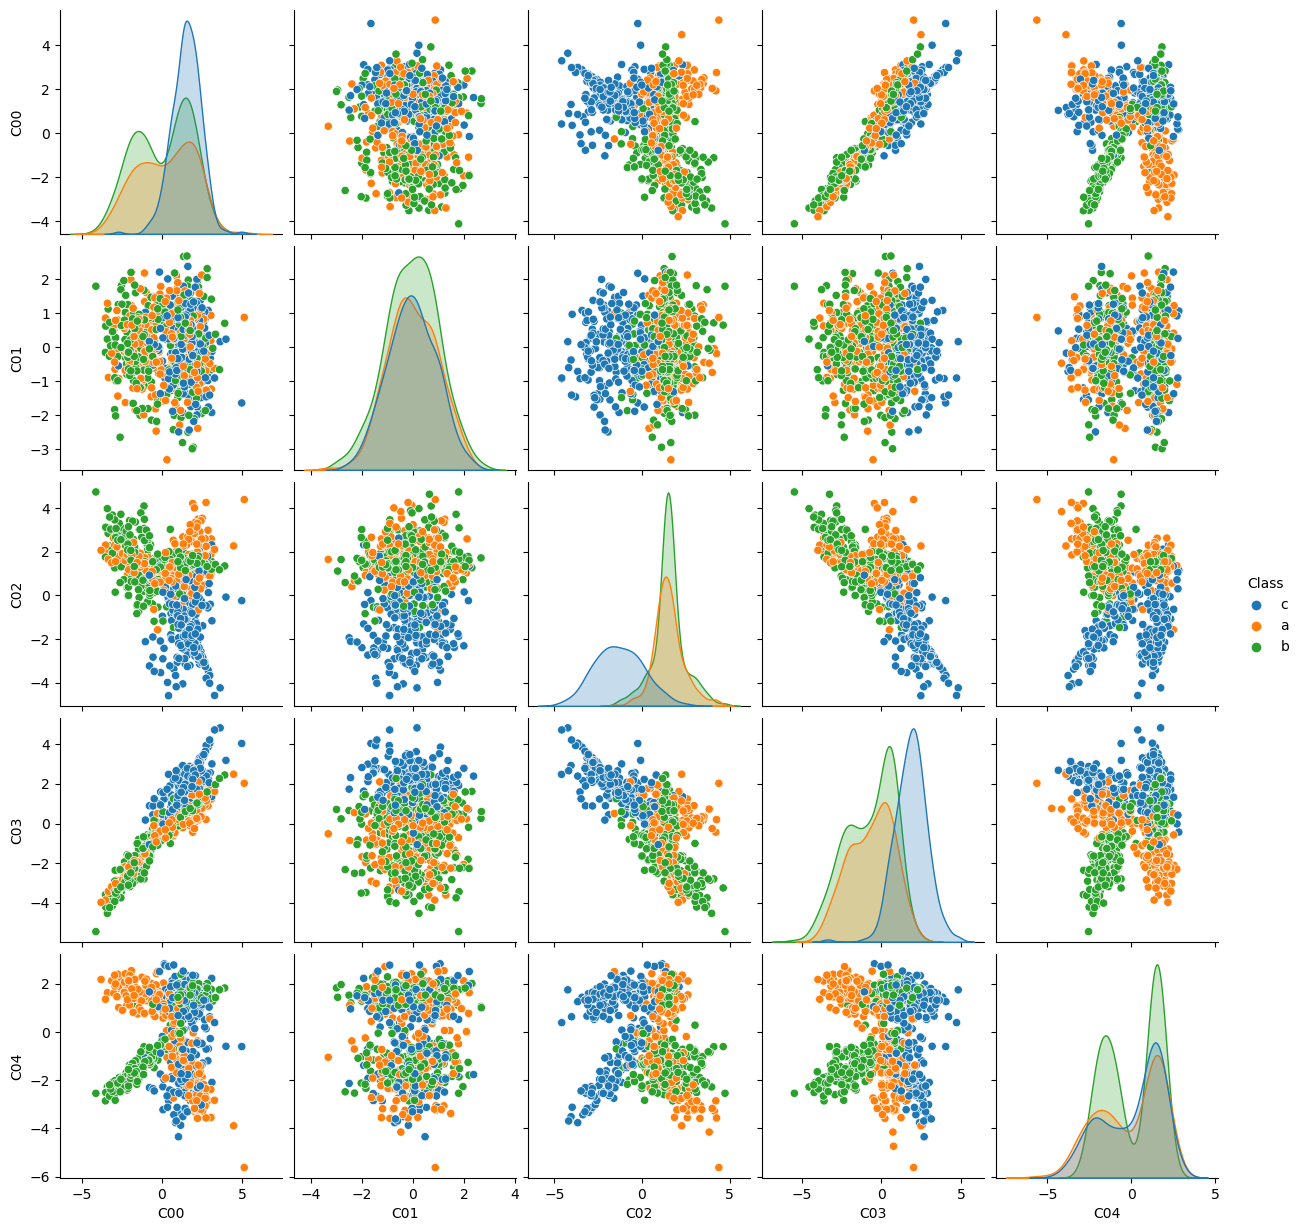

In [36]:
# pairplot using target as color

sns.pairplot( data = df0, hue = target,  diag_kind = "kde")

Verify if there are `nan` values in the dataset, and, in case, drop rows with `nan`

In [42]:
# Missing values for each column
missing_values = df0.isna().sum()
print(missing_values)
# Total number of missing values in the dataset
missing0 = df0.isna().sum().sum()
print("The total number of missing values in the data set is {}".format(missing0))

C00       93
C01      110
C02      120
C03       91
C04      105
Class      0
dtype: int64
The total number of missing values in the data set is 519


In [43]:
df = df0.dropna(axis = 0)
missing = df.isna().sum().sum()
print("After drop there are {} nan values".format(missing))

After drop there are 0 nan values


- Split predicting attributes and target into `X` and `y`
- Show the number of samples in train and test, show the number of features

In [45]:
X = df.drop([target], axis = 1) 
y = df[target] 
random_state = 42
train_size = 0.67
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    , train_size = train_size
                                                    , random_state = random_state)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 387 samples in the training dataset
There are 192 samples in the testing dataset
Each sample has 5 features


Optimising the estimator

- determine the range of the parameters for the estimator
- repeatedly fit the estimator with cross validation for each value of the parameter range and find the value of the parameter giving the best accuracy
- print the value of the best parameter


In [69]:
#                                Decision Tree

fitted_max_depth = 56
tuned_param_dt = [{'max_depth': [*range(1,fitted_max_depth+1)] 
                , 'criterion' : ['entropy', 'gini']
                , 'class_weight' : [None, 'balanced']}]

cv = 3
estimator = DecisionTreeClassifier(random_state=random_state)
clf = GridSearchCV(estimator, tuned_param_dt, cv = cv
                           ,scoring= "accuracy"
                           
                           ) 
   
clf.fit(X_train, y_train)
print("The best combination of parameters in order to maximise accuracy is the following {}".format(clf.best_params_))


The best combination of parameters in order to maximise accuracy is the following {'class_weight': None, 'criterion': 'gini', 'max_depth': 9}


- fit the estimator using the `train` part
- use the fitted estimator to predict using the test features
- compute the accuracy on the test set and print it with the best parameter value
- print a classification report and the confusion matrix for the test set

In [74]:
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred) * 100
print("The accuracy on test set is {0:.1f}%".format(accuracy_test))
print("The best parameters of this estimator are {}".format(clf.best_params_))



The accuracy on test set is 88.0%
The best parameters of this estimator are {'class_weight': None, 'criterion': 'gini', 'max_depth': 9}


              precision    recall  f1-score   support

           a       0.84      0.90      0.87        52
           b       0.90      0.86      0.88        76
           c       0.89      0.89      0.89        64

    accuracy                           0.88       192
   macro avg       0.88      0.88      0.88       192
weighted avg       0.88      0.88      0.88       192



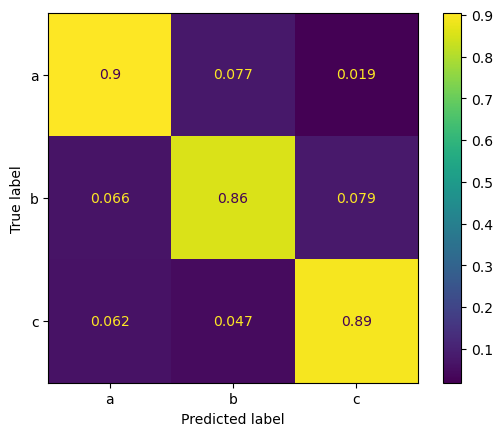

In [75]:
# classification report on test set
print(classification_report(y_test, y_test_pred, zero_division=0))
cm = confusion_matrix(y_test, y_test_pred, labels=estimator.classes_, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm
                                , display_labels=clf.classes_)
disp.plot()    

   

In [71]:
# Confusion matrix for test set


AttributeError: 'DecisionTreeClassifier' object has no attribute 'classes_'